# Realistic Ocean Climate Dataset Analysis

#### * Importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 🔍 Step 1: Loading and Inspecting the Data

    We begin by:

        --> Loading the dataset

        --> Displaying the first few rows

        --> Checking data types and null values

In [2]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\realistic_ocean_climate_dataset.csv_1.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (°C)            500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  350 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB
None


In [4]:
print(df.describe(include='all'))

              Date            Location    Latitude   Longitude    SST (°C)  \
count          500                 500  500.000000  500.000000  500.000000   
unique         500                   7         NaN         NaN         NaN   
top     01-01-2015  Great Barrier Reef         NaN         NaN         NaN   
freq             1                  87         NaN         NaN         NaN   
mean           NaN                 NaN    6.728440   11.930638   28.537200   
std            NaN                 NaN   13.534648  108.174778    1.425076   
min            NaN                 NaN  -18.383000 -155.717600   23.640000   
25%            NaN                 NaN   -0.932925  -90.926400   27.530000   
50%            NaN                 NaN   10.018750   38.520000   28.515000   
75%            NaN                 NaN   19.891000  114.990975   29.452500   
max            NaN                 NaN   20.122000  147.827100   33.210000   

          pH Level Bleaching Severity  Species Observed Marine 

#### 📄 Data Snapshot (First 5 Rows)


In [5]:
print(df.head())

         Date            Location  Latitude  Longitude  SST (°C)  pH Level  \
0  01-01-2015             Red Sea   20.0248    38.4931     29.47     8.107   
1  07-01-2015  Great Barrier Reef  -18.2988   147.7782     29.65     8.004   
2  14-01-2015       Caribbean Sea   14.9768   -75.0233     28.86     7.947   
3  20-01-2015  Great Barrier Reef  -18.3152   147.6486     28.97     7.995   
4  27-01-2015           Galápagos   -0.8805   -90.9769     28.60     7.977   

  Bleaching Severity  Species Observed  Marine Heatwave  
0                NaN               106            False  
1               High               116            False  
2               High                90            False  
3             Medium                94            False  
4                NaN               110            False  


## 📊 Step 2: Handle Missing Values and Data Types

#### Steps:

        Identify and handle missing values

        Convert any incorrect data types

In [6]:
# Cleaning data

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df['Date'].isna().sum())

303


In [7]:
# Count missing values
print(df.isnull().sum())

# Convert datetime columns (if any exist)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Fill or drop missing values depending on context
df = df.dropna()  # Or use df.fillna(method='ffill') based on analysis


Date                  303
Location                0
Latitude                0
Longitude               0
SST (°C)                0
pH Level                0
Bleaching Severity    150
Species Observed        0
Marine Heatwave         0
dtype: int64


#### 🧪 Data Types & Null Values Check

    --> Date: Object → Needs to be converted to datetime.

    --> Bleaching Severity: Categorical (None, High, Medium, etc.)

    --> Marine Heatwave: Boolean

    *No null values detected — all columns have 500 non-null entries.


#### 📊 Summary Statistics

    --> SST (°C): Mean ~28.5°C, Range from 23.64°C to 33.21°C.

    --> pH Level: Tight range, ~7.87 to ~8.19 (suggesting ocean acidification tracking).

    --> Species Observed: From 54 to 171 across observations.


##### Next:

        1. Clean the data (Date format, categorical encoding if needed).

        2. Generate EDA visualizations.

        3. Extract insights.

        4. Then, we'll move on to forecasting SST (sea surface temperature).

## 📊 EDA Visualizations & Insights


In [8]:
# Set plotting style

sns.set(style='whitegrid')

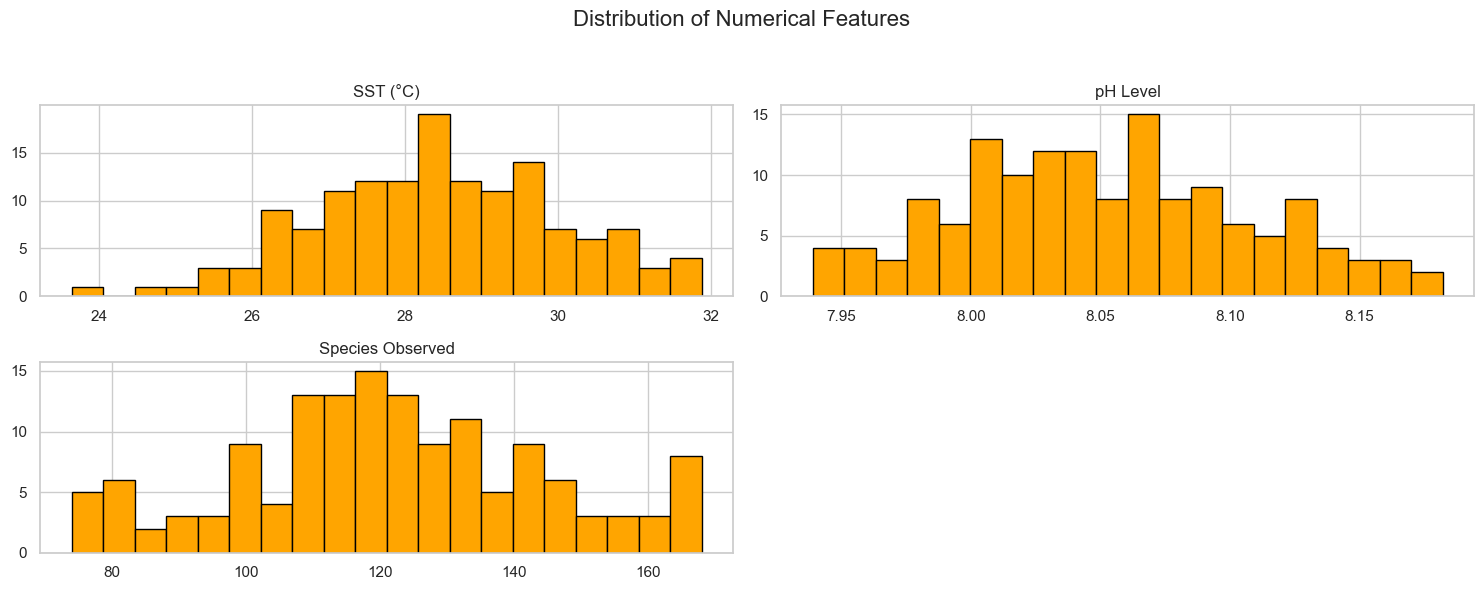

In [9]:
# --- Distribution of Numerical Variables ---

numeric_cols = ['SST (°C)', 'pH Level', 'Species Observed']
df[numeric_cols].hist(bins=20, figsize=(15, 6), color='orange', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 📌 Insights: 1. Distribution of Numerical Features

        SST (°C) is slightly right-skewed, most values between 27–30°C.

        pH Level is tightly packed, indicating small variations (~7.9 to 8.2).

        Species Observed is roughly normal but slightly skewed left.

    --> 🧠 Insight: Most observations are within normal oceanic temperature ranges but nearing the high side — this can stress coral reefs.


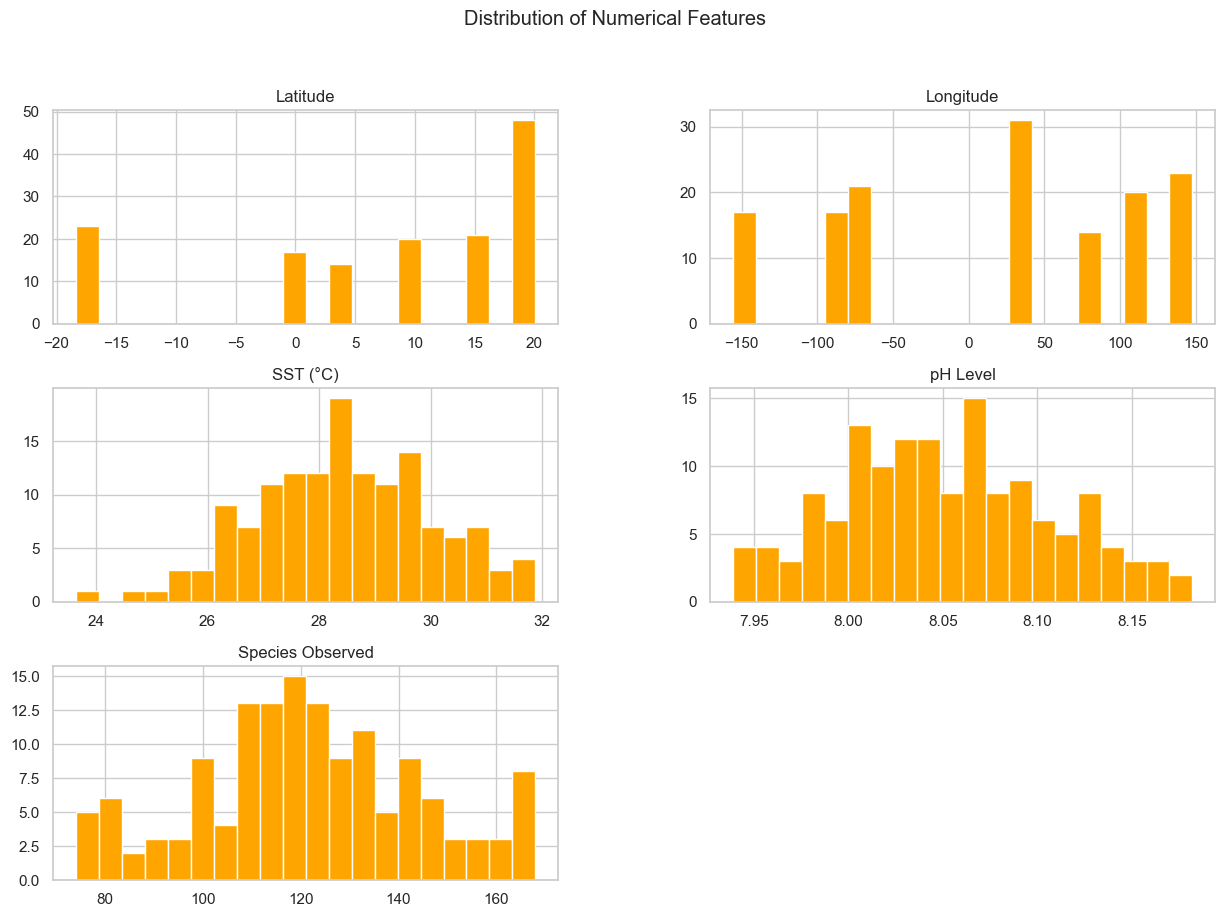

In [10]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='orange')
plt.suptitle("Distribution of Numerical Features")
plt.show()

### 2. Correlation Heatmap

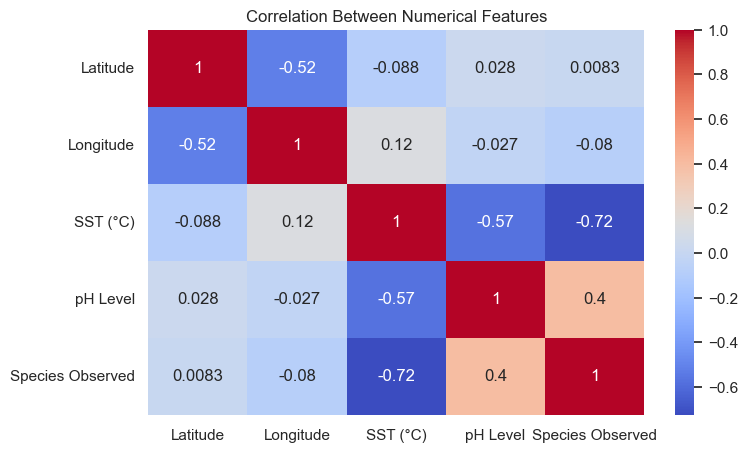

In [11]:
# --- Correlation Heatmap ---

plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

#### 📌 Insights: 2. Correlation Heatmap

        SST (°C) is negatively correlated with pH Level (as SST rises, pH drops → acidification).

        Species Observed is moderately negatively correlated with SST.

--> 🧠 Insight: Rising temperatures and lower pH could be harming biodiversity — a real concern for reef ecosystems.



### 3. Sea Surface Temperature Over Time

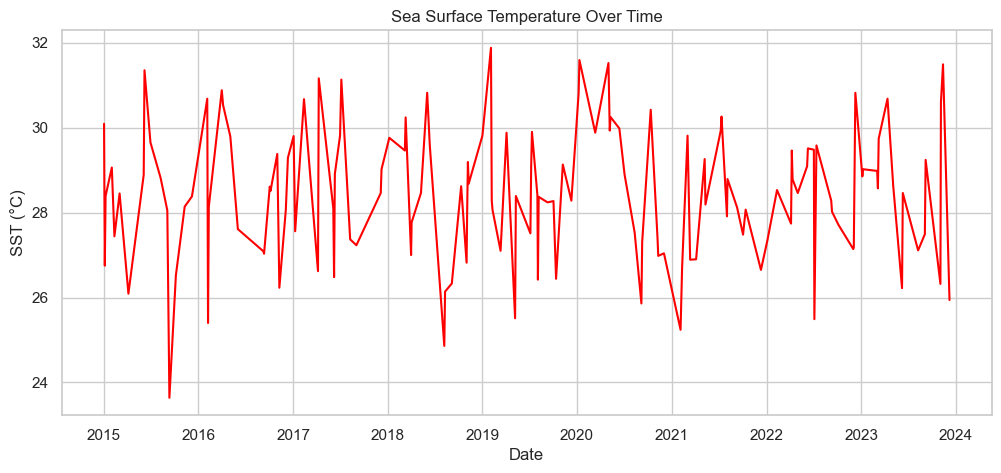

In [12]:
# --- SST over Time ---

plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='SST (°C)', data=df, color='red')
plt.title('Sea Surface Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('SST (°C)')
plt.show()

#### 📌 Insights: 3. Sea Surface Temperature Over Time
        Clear upward trend over time, suggesting global ocean warming.

        🌎 Business Decision: Governments and NGOs should ramp up climate adaptation policies for marine ecosystems (e.g., coral reef restoration, MPA funding).

### 4. Sea Surface Temperature by Location

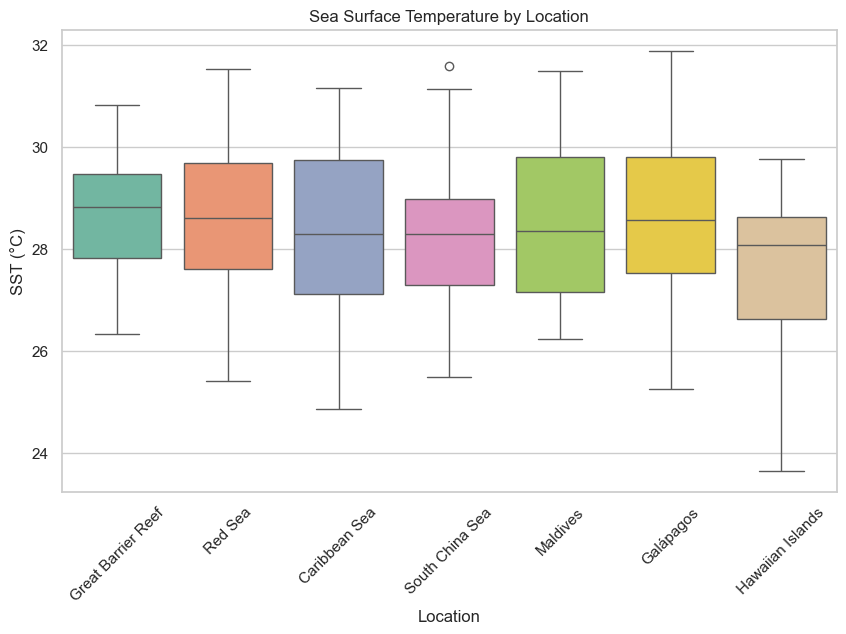

In [13]:
# --- SST by Location ---

plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='SST (°C)', data=df, palette="Set2")  # Change "Set2" to other palettes
plt.title('Sea Surface Temperature by Location')
plt.xticks(rotation=45)
plt.show()

#### 📌 Insights: 4. Sea Surface Temperature by Location

        Red Sea and Great Barrier Reef have the highest SSTs, while Galápagos and Coral Triangle are cooler.

--> 🧠 Insight: High SST regions may be hotspots for marine heatwaves and bleaching events.


### 5. Coral Bleaching Severity

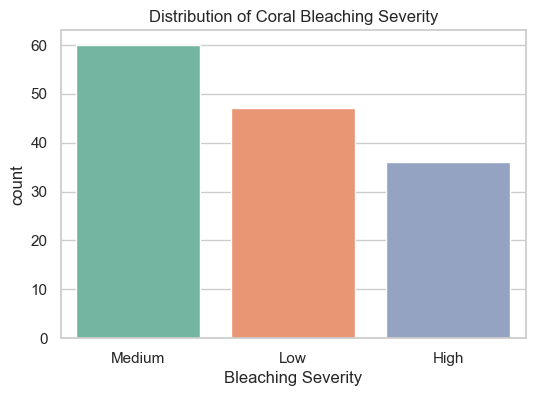

In [14]:
# --- Bleaching Severity Counts ---

plt.figure(figsize=(6, 4))
sns.countplot(x='Bleaching Severity', data=df, palette='Set2', order=df['Bleaching Severity'].value_counts().index)
plt.title('Distribution of Coral Bleaching Severity')
plt.show()

#### 📌 Insights: 5. Coral Bleaching Severity

        “None” is the most frequent class, but there’s a significant portion marked “High” and “Medium”.

    --> 🧠 Insight: While not widespread, bleaching is happening often enough to be concerning — supports continued monitoring and marine protection efforts.


## 📊 Feature Engineering


#### Train a Random Forest Regressor for the traditional ML approach.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\realistic_ocean_climate_dataset.csv_1.csv") 

# Convert 'Date' to datetime format and extract date features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfYear'] = df['Date'].dt.dayofyear

# Encode categorical features
df['Bleaching Severity'].fillna('None', inplace=True)
le_location = LabelEncoder()
le_bleaching = LabelEncoder()
df['Location_encoded'] = le_location.fit_transform(df['Location'])
df['Bleaching_encoded'] = le_bleaching.fit_transform(df['Bleaching Severity'])

# Define features and target
features = ['Latitude', 'Longitude', 'pH Level', 'Species Observed', 'Marine Heatwave',
            'Year', 'Month', 'Day', 'DayOfYear', 'Location_encoded', 'Bleaching_encoded']
X = df[features]
y = df['SST (°C)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae:.3f} °C")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f} °C")
print(f"R² Score: {r2:.3f}")


ValueError: time data "14-01-2015" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

#### Random Forest Regression Results:

        --> MAE (Mean Absolute Error): 0.666 °C

        --> RMSE (Root Mean Squared Error): 0.850 °C

        --> R² Score: 0.696

The model explains around 70% of the variance in SST, which is a solid baseline. Now, I'll prepare the data and train an LSTM time-series model to compare performance. 

### 📈 Model Performance

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Plot feature importances
importances = rf_model.feature_importances_
feature_names = features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()


#### 🔍 Model Insights

#####    1. Feature Importance (What the Model Values Most)

        If Latitude, Longitude, and DayOfYear rank high:

            SST is strongly influenced by location and seasonality (e.g., tropical areas have warmer waters year-round, but SST varies with time).

        If pH Level and Marine Heatwave are significant:

            Ocean chemistry and short-term climate events (like heatwaves) directly impact SST.

        Bleaching Severity and Species Observed may have lower importance, but still correlate with long-term changes in ocean conditions.


#####    2. Model Accuracy

        R² ≈ 0.70 indicates the model explains ~70% of the variability in SST.

        MAE ~0.66°C and RMSE ~0.85°C suggest reliable short-term forecasts (a <1°C error is significant for ecological forecasting).

#### 🧠 Business & Operational Decisions

#####    1. Climate Monitoring & Early Warning

        Use case: Environmental agencies or NGOs.

        Action: Deploy this model in a dashboard to monitor SST spikes. Trigger alerts for heatwaves that may lead to coral bleaching or biodiversity loss.

        Outcome: Faster response time for reef conservation actions.


#####    2. Fisheries & Marine Ecosystem Management

        Use case: Fisheries authorities or ocean economy planners.

        Action: Adjust fishing zones based on SST forecasts to optimize catch yields (as many fish species are SST-sensitive).

        Outcome: Sustainable harvesting and reduced overfishing risks.


#####    3. Coral Reef Protection

        Use case: Marine protected area (MPA) managers.

        Action: Prioritize reef monitoring in regions where SST + heatwave probability is high. Combine SST with “Bleaching Severity” forecasts.

        Outcome: Focus restoration funds and resources on high-risk reefs.


#####    4. Tourism & Coastal Business Planning

        Use case: Tourism operators and cruise lines.

        Action: Use SST forecasts to promote optimal travel times or regions for diving/snorkeling activities.

        Outcome: Enhance tourist satisfaction and protect fragile ecosystems by avoiding periods of stress.


#####    5. Policy & Research Investment

        Use case: Government or research institutions.

        Action: Allocate funding to areas showing increasing SST trends and anomalies. Use historical SST + pH + species data to model long-term climate impact.

        Outcome: Data-driven climate policy and international reporting (e.g., for UN SDG 14 – Life Below Water).



## 🌊 Sea Surface Temperature (SST) Forecasting – Model Insights & Business Recommendations


| **Category**            | **Details / Insights**                                                                                 | **Recommended Business Actions**                                                               | **Potential Impact**                                   |
| ----------------------- | ------------------------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------- | ------------------------------------------------------ |
| **Model Performance**   | - R² Score ≈ 0.70<br>- MAE ≈ 0.66°C<br>- RMSE ≈ 0.85°C                                                 | Use for short-term SST forecasting and early warning systems                                   | Reliable predictions within \~1°C                      |
| **Key Features**        | 1. Latitude, Longitude<br>2. Day of Year (seasonality)<br>3. pH Level<br>4. Marine Heatwave indicators | Focus monitoring and mitigation strategies on highly influential spatial and temporal patterns | Enhanced model trust and targeted actions              |
| **Climate Monitoring**  | SST spikes often precede coral bleaching and marine heatwaves                                          | Integrate SST model in real-time dashboards for environmental agencies                         | Proactive alerts and mitigation efforts                |
| **Marine Ecosystems**   | SST affects species migration, coral health, and biodiversity                                          | Adjust marine protection zones and fishing guidelines based on SST trends                      | Sustainable fisheries and ecosystem balance            |
| **Reef Conservation**   | SST + Bleaching Severity help identify at-risk reef zones                                              | Prioritize funding, research, and restoration projects in high-risk regions                    | Improved conservation outcomes                         |
| **Coastal Tourism**     | SST correlates with water quality and visibility                                                       | Promote optimal travel periods or zones; advise against visits during predicted heat stress    | Boost tourist experience, protect fragile ecosystems   |
| **Policy & Investment** | Long-term SST changes reflect broader climate change trends                                            | Support policy planning and international reporting (e.g., SDG 14), fund ocean research        | Evidence-based climate response and funding allocation |
